Analysis
- Fox, CBS and BBC media sources has more positive tweets compared to others.
- New york times has equal number of positive, negative and neutral tweets.
- CBS media source has the highest positive tweets.

In [22]:
# Import Dependencies
import json
import tweepy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [23]:
# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [24]:
org = ["BBC","CBS","CNN","Fox","nytimes"]
screen_name=[]
text=[]
date =[]
compound_list = []
negative_list = []
positive_list = []
neutral_list = []

for news in org:
    for x in range(5):
        public_tweets = api.user_timeline(news, page=x)
        for tweet in public_tweets:
            converted_date = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            date.append(converted_date)
            screen_name.append(tweet["user"]["screen_name"])
            text.append(tweet["text"])
            score = analyzer.polarity_scores(tweet["text"])
            compound_list.append(score["compound"])
            negative_list.append(score["neg"])
            positive_list.append(score["pos"])
            neutral_list.append(score["neu"])
       
org_results = pd.DataFrame({"screen_name": screen_name,
              "created at": date, 
              "text": text, 
              "compound": compound_list,
              "negative": negative_list, 
              "positive": positive_list, 
              "neutral": neutral_list})   

org_results.to_csv("Tweet_results.csv")
org_results.head()

,compound,created at,negative,neutral,positive,screen_name,text
0,-0.296,2018-03-29 20:41:00+00:00,0.099,0.901,0.0,BBC,At a time when men thought women shouldn't spe...
1,0.000,2018-03-29 18:45:08+00:00,0.000,1.000,0.0,BBC,RT @BBCBreakfast: Counting down the hours unti...
2,0.000,2018-03-29 18:44:20+00:00,0.000,1.000,0.0,BBC,RT @bbcrb: Retirement's looking rosy for Hank ...
3,0.000,2018-03-29 18:44:11+00:00,0.000,1.000,0.0,BBC,RT @BBCNewsbeat: Anthony Joshua faces Joseph P...
4,0.000,2018-03-29 18:43:51+00:00,0.000,1.000,0.0,BBC,RT @BBCOne: Anyone else having a 'chilled one'...


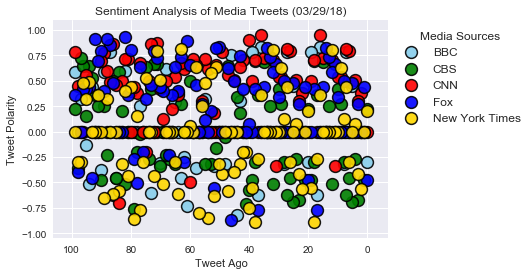

In [25]:
bbc = org_results.loc[org_results.screen_name == "BBC", :]
cbs = org_results.loc[org_results.screen_name == "CBS", :]
cnn = org_results.loc[org_results.screen_name == "CNN", :]
fox = org_results.loc[org_results.screen_name == "fox", :]
nyt = org_results.loc[org_results.screen_name == "nytimes", :]

sns.set()
plt.gca().invert_xaxis()
bbc_plot = plt.scatter(range(len(bbc)), bbc["compound"], s=140, marker = 'o', c='SkyBlue', linewidths = 1.5, edgecolors='black', alpha=0.9, label="BBC")
cnn_plot = plt.scatter(range(len(cnn)), cnn["compound"], s=140, marker = 'o', c='green', linewidths = 1.5, edgecolors='black', alpha=0.9, label="CBS")
cbs_plot = plt.scatter(range(len(cbs)), cbs["compound"], s=140, marker = 'o', c='red', linewidths = 1.5, edgecolors='black', alpha=0.9, label="CNN")
fox_plot = plt.scatter(range(len(fox)), fox["compound"], s=140, marker = 'o', c='blue', linewidths = 1.5, edgecolors='black', alpha=0.9, label="Fox")
nyt_plot = plt.scatter(range(len(nyt)), nyt["compound"], s=140, marker = 'o', c='gold', linewidths = 1.5, edgecolors='black', alpha=0.9, label="New York Times")

plt.title(f"Sentiment Analysis of Media Tweets ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Tweet Ago")
plt.ylabel("Tweet Polarity")
plt.legend(handles=[bbc_plot, cnn_plot,cbs_plot, fox_plot, nyt_plot], bbox_to_anchor=(1,1), fontsize=12, title="Media Sources")

plt.savefig("Sentiment Analysis of Media Tweets.png")
plt.show()


In [26]:
overall_compound = org_results.groupby("screen_name").mean()["compound"]
overall_compound

screen_name
BBC        0.049905
CBS        0.364953
CNN       -0.019417
fox        0.263628
nytimes   -0.049805
Name: compound, dtype: float64

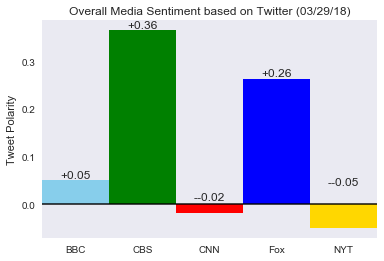

In [27]:
comp_percent = (overall_compound["BBC"],
                overall_compound["CBS"], 
                overall_compound["CNN"], 
                overall_compound["fox"], 
                overall_compound["nytimes"])

fig, ax = plt.subplots()
ind = np.arange(len(comp_percent))  
width = 1
rect1 = ax.bar(ind[0], comp_percent[0], width, color="skyblue")
rect2 = ax.bar(ind[1], comp_percent[1], width, color="green")
rect3 = ax.bar(ind[2], comp_percent[2], width, color="red")
rect4 = ax.bar(ind[3], comp_percent[3], width, color='blue')
rect5 = ax.bar(ind[4], comp_percent[4], width, color='gold')

ax.set_ylabel("Tweet Polarity")
ax.set_title(f"Overall Media Sentiment based on Twitter ({datetime.today().strftime('%m/%d/%y')})")
ax.set_xticks(ind)
ax.set_xticklabels(("BBC", "CBS","CNN", "Fox","NYT"))
ax.set_xlim([-0.5,4.5])
ax.grid(False)
plt.hlines(0,-0.5, 4.5, alpha=0.8)

# Generate labels for each news source
def autolabelpos(rects):
   # attach some text labels
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., 1*height,
               '+%.2f' % float(height),
               ha='center', va='bottom')

def autolabelneg(rects):
   # attach some text labels
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
               '-%.2f' % float(height),
               ha='center', va='bottom')

autolabelpos(rect1)
autolabelpos(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

plt.savefig(f"Overall Media Sentiment based on Twitter.png")
plt.show()